In [2]:
#import library
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 20

In [3]:

#import the dataset
bostonHouseFrame = pd.read_csv('/Users/tranhuuhoang/Desktop/housing.data.csv', delimiter='\s+')
print(bostonHouseFrame)

#The output is a table with house prices and some associated factors with the prices
#There are some difficulties in loading the data set, it did not show full row of data
# and the columns are not continuous with others, e.g. the columns PTRATIO, B, LSTAT, MEDV 
# For displaying full rows of data, adjust the maximum row displayed (In this ex, max_rows = 600)


         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   

In [4]:
pd.DataFrame.max(bostonHouseFrame)
pd.DataFrame.describe(bostonHouseFrame)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 432x288 with 0 Axes>

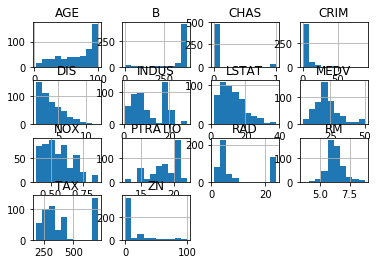

In [5]:
plt.figure()
bostonHouseFrame.hist()
plt.show()

#Interpret the histogram
#1. Assess the key characteristics, which defines the peak, spread and symmetry (right skew, left skew))
#2. Define multiple modes or outliers 
    # multiple modes: multiple peaks
    # outliers, which are data values that are far away from other data values, can strongly affect your results,e.g CHAS, RAD histogram


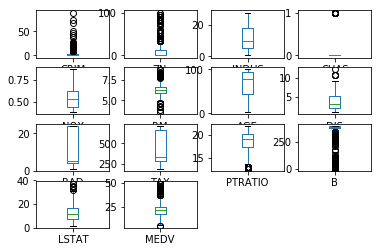

In [6]:
bostonHouseFrame.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

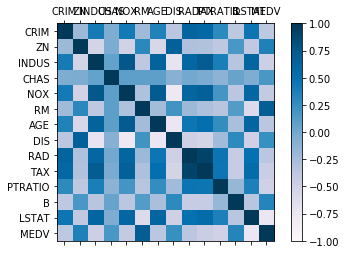

In [7]:
correlations = bostonHouseFrame.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(bostonHouseFrame.columns)
ax.set_yticklabels(bostonHouseFrame.columns)
plt.show()

#Which features do you think are correlated?
#RAD-TAX

In [8]:
#Visualize Distributions with seaborn
def plotHist():
    for ax, col in zip(axes.flat, bostonHouseFrame.columns):
        sns.distplot(bostonHouseFrame[col], color = 'red', ax=ax)


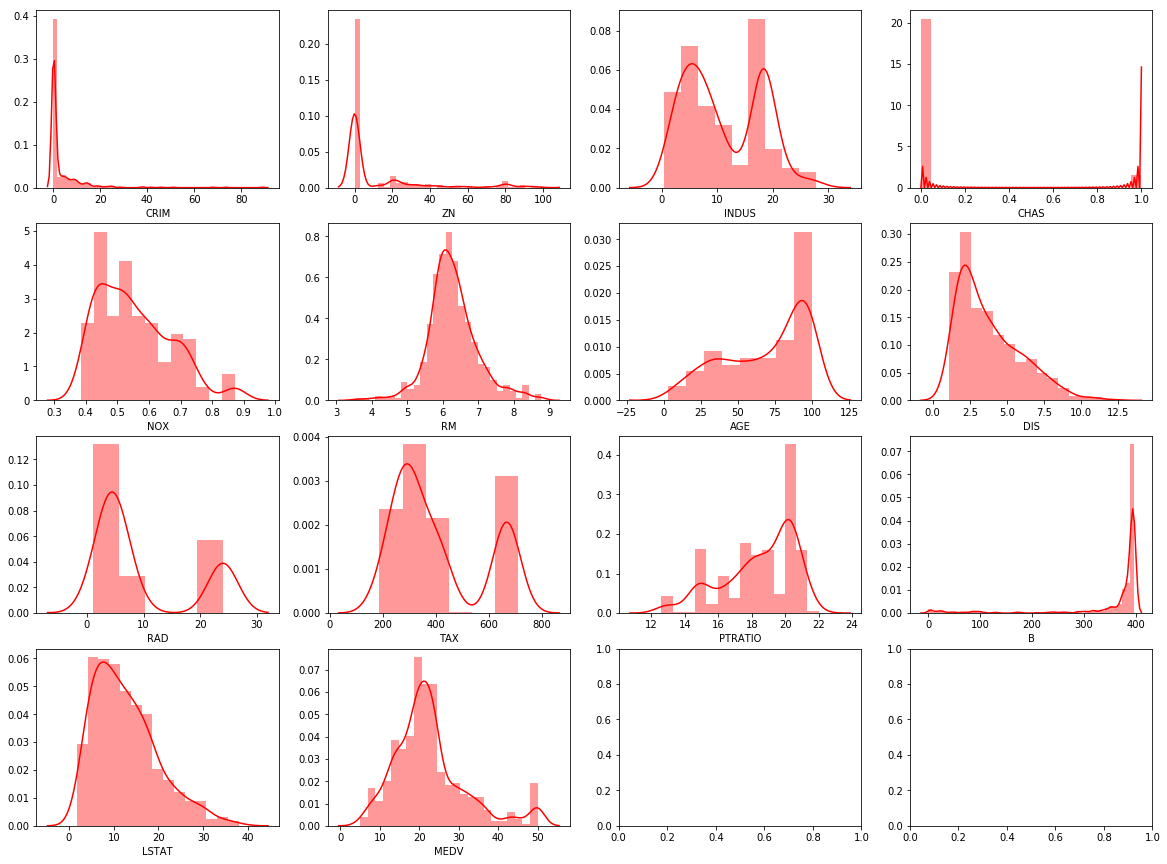

In [9]:
f, axes = plt.subplots(4, 4, figsize=(20,15), sharex=False)
plotHist()


In [10]:
def plotBox():
    for ax, col in zip(axes.flat, bostonHouseFrame.columns):
        sns.boxplot(bostonHouseFrame[col], color = 'red', ax=ax)



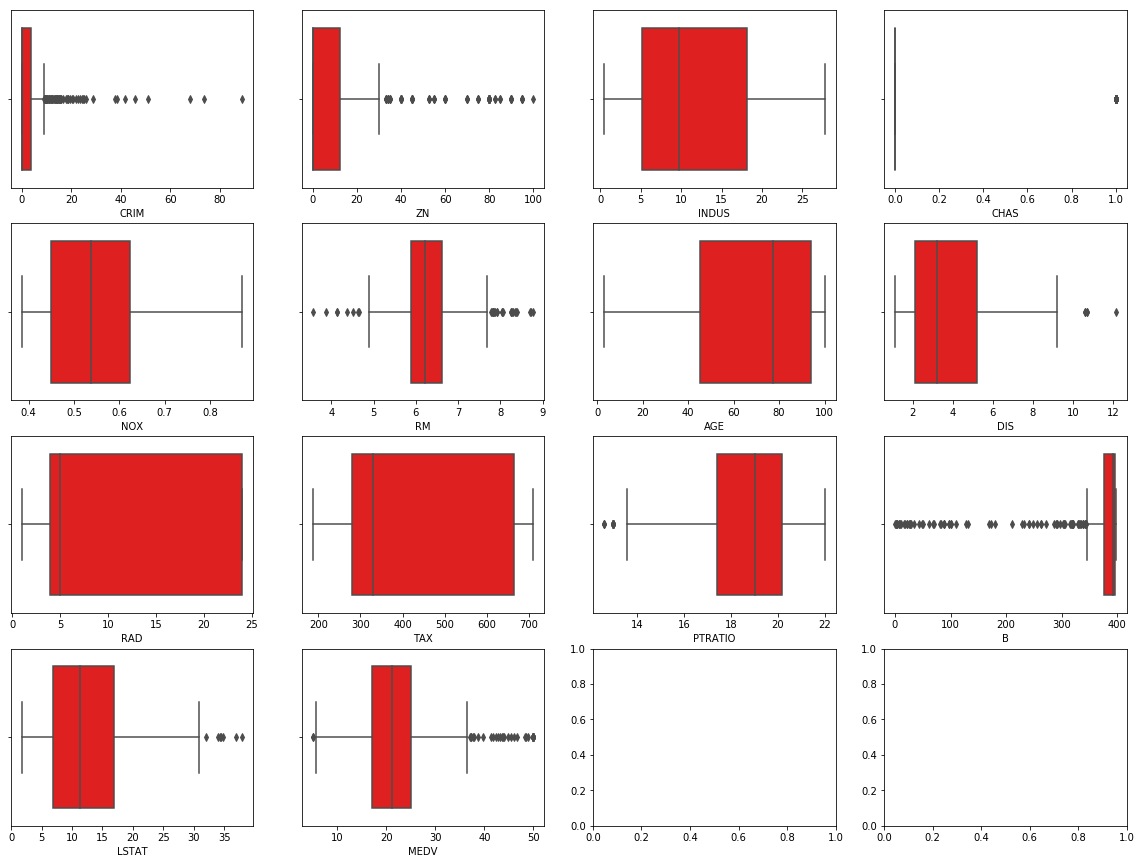

In [11]:
f, axes = plt.subplots(4, 4, figsize=(20,15), sharex=False)
plotBox()

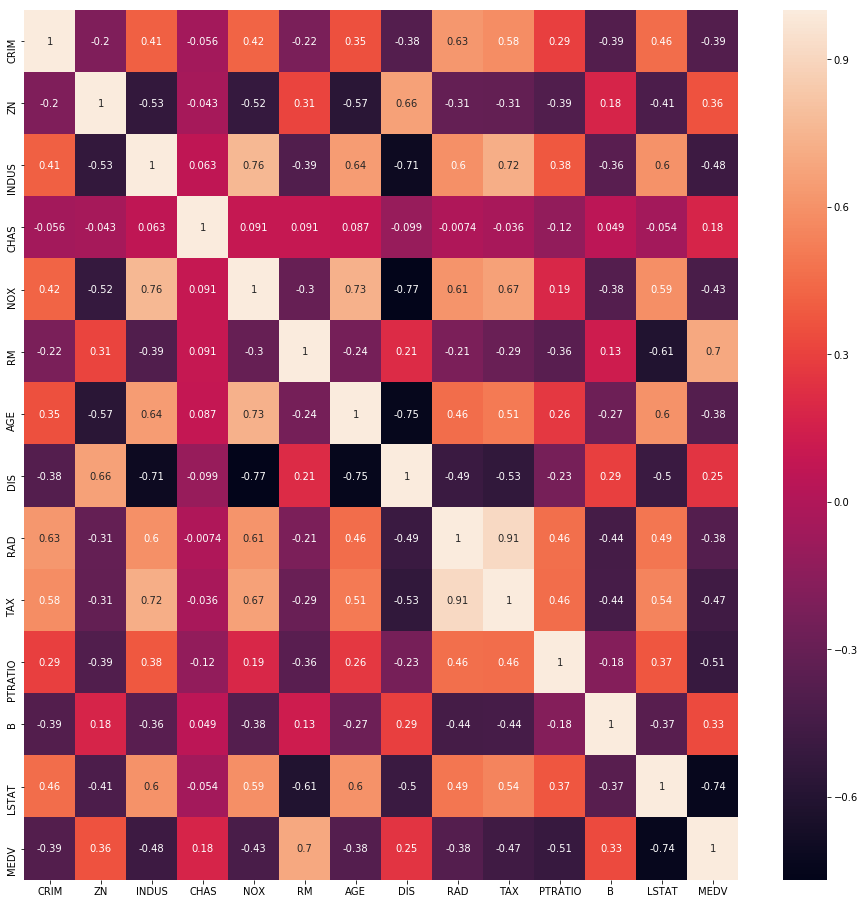

In [12]:
#Correlation plot using seaborn package
plt.figure(figsize = (16,16))
sns.heatmap(bostonHouseFrame.corr(), annot = True)